In [8]:
import pandas as pd
import numpy as np
from pathlib import Path

In [9]:
# The path to our CSV file
athleteInfo = Path("Resources/ForbesInfo.csv")

athlete_df = pd.read_csv(athleteInfo)
athlete_df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [10]:
athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [11]:
athlete_df.columns

Index(['S.NO', 'Name', 'Nationality', 'Current Rank', 'Previous Year Rank',
       'Sport', 'Year', 'earnings ($ million)'],
      dtype='object')

In [12]:
athlete_df = athlete_df.set_index("S.NO")
athlete_df.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
S.NO,,,,,,,
1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [15]:
# Count hoy many entries there are per sport
sportCount = athlete_df.groupby("Sport").Sport.count().sort_values(ascending = False)
sportCount

Sport
Basketball                      54
Boxing                          29
basketball                      27
Golf                            24
Soccer                          22
golf                            20
Tennis                          18
American Football               17
boxing                          17
soccer                          11
Auto Racing                     10
F1 racing                        8
auto racing                      7
tennis                           5
F1 Motorsports                   5
motorcycle gp                    4
NFL                              3
baseball                         3
Baseball                         3
NASCAR                           3
Ice Hockey                       2
Auto Racing (Nascar)             2
American Football / Baseball     1
NBA                              1
MMA                              1
Hockey                           1
cycling                          1
Auto racing                      1
ice hockey    

In [17]:
athlete_df.loc[athlete_df.Sport=="basketball", "Sport"] = "Basketball"
athlete_df.loc[athlete_df.Sport=="boxing", "Sport"] = "Boxing"
athlete_df.loc[athlete_df.Sport=="golf", "Sport"] = "Golf"
athlete_df.loc[athlete_df.Sport=="soccer", "Sport"] = "Soccer"
athlete_df.loc[athlete_df.Sport=="ice hockey", "Sport"] = "Ice Hockey"
athlete_df.loc[athlete_df.Sport=="hockey", "Sport"] = "Ice Hockey"
athlete_df.loc[athlete_df.Sport=="Hockey", "Sport"] = "Ice Hockey"
athlete_df.loc[athlete_df.Sport=="American Football / Baseball", "Sport"] = "American Football"
athlete_df.loc[athlete_df.Sport=="NFL", "Sport"] = "American Football" 
athlete_df.loc[athlete_df.Sport=="baseball", "Sport"] = "Baseball"
athlete_df.loc[athlete_df.Sport=="tennis", "Sport"] = "Tennis"
athlete_df.loc[athlete_df.Sport=="NBA", "Sport"] = "Basketball"
athlete_df.loc[athlete_df.Sport=="F1 racing", "Sport"] = "F1 Motorsports"
athlete_df.loc[athlete_df.Sport=="cycling", "Sport"] = "Cycling"
athlete_df.loc[athlete_df.Sport=="NBA", "Sport"] = "Basketball"
athlete_df.loc[athlete_df.Sport=="F1 racing", "Sport"] = "F1 Motorsports"
athlete_df.loc[athlete_df.Sport=="cycling", "Sport"] = "Cycling"
athlete_df.loc[athlete_df.Sport=="tennis", "Sport"] = "Tennis"
athlete_df.loc[athlete_df.Sport=="Hockey", "Sport"] = "Ice Hockey"
athlete_df.loc[athlete_df.Sport=="American Football / Baseball", "Sport"] = "American Football"
athlete_df.loc[athlete_df.Sport=="NFL", "Sport"] = "American Football" 
athlete_df.loc[athlete_df.Sport=="ice hockey", "Sport"] = "Ice Hockey"
athlete_df.loc[athlete_df.Sport=="baseball", "Sport"] = "Baseball"
athlete_df.loc[athlete_df.Sport=="soccer", "Sport"] = "Soccer"
athlete_df.loc[(athlete_df.Sport== "NASCAR") | (athlete_df.Sport== "auto racing") | (athlete_df.Sport== "Auto racing") |(athlete_df.Sport== "Auto Racing (Nascar)"), "Sport"] = "Auto Racing"
athlete_df.loc[athlete_df.Sport=="motorcycle gp", "Sport"] = "Motorcycle GP"

athlete_df.Sport.value_counts()

Sport
Basketball           82
Boxing               46
Golf                 44
Soccer               33
Auto Racing          23
Tennis               23
American Football    21
F1 Motorsports       13
Baseball              6
Ice Hockey            4
Motorcycle GP         4
Cycling               1
MMA                   1
Name: count, dtype: int64

In [18]:
inflation_data = Path("Resources/uscpi.csv")

inflation_df = pd.read_csv(inflation_data)
inflation_df.head()

,Yearmon,CPI
0,01-01-1913,9.8
1,01-02-1913,9.8
2,01-03-1913,9.8
3,01-04-1913,9.8
4,01-05-1913,9.7


In [101]:
inflation_df[['Day','Month', 'Year']] = inflation_df['Yearmon'].str.split('-',expand=True)
inflation_df["Year"] = inflation_df.Year.astype("int64")
inflation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Yearmon  1303 non-null   object 
 1   CPI      1303 non-null   float64
 2   Day      1303 non-null   object 
 3   Month    1303 non-null   object 
 4   Year     1303 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 51.0+ KB


In [102]:
inflation_year = inflation_df.groupby('Year').CPI.mean().reset_index()

In [103]:
inflation_year

,Year,CPI
0,1913,9.883333
1,1914,10.016667
2,1915,10.108333
3,1916,10.883333
4,1917,12.825000
...,...,...
104,2017,245.119583
105,2018,251.106833
106,2019,255.657417
107,2020,258.811167


In [104]:
inflation_year.columns

Index(['Year', 'CPI'], dtype='object')

In [111]:
# Add inflation column and calculate inflation with 1990 as base year
# inflation_year["inflation"] = np.nan

base = inflation_year.loc[inflation_year.Year == 1990, "CPI"].values[0]
base
inflation_year["inflation"] = inflation_year.CPI.apply(lambda row : ((row - base)/base))

inflation_year

,Year,CPI,inflation
0,1913,9.883333,-0.924357
1,1914,10.016667,-0.923337
2,1915,10.108333,-0.922635
3,1916,10.883333,-0.916704
4,1917,12.825000,-0.901843
...,...,...,...
104,2017,245.119583,0.876035
105,2018,251.106833,0.921859
106,2019,255.657417,0.956687
107,2020,258.811167,0.980824


In [127]:
sub_inflation_df = inflation_year.loc[inflation_year.Year >= 1990]
sub_inflation_df.head()
sub_inflation_df.dtypes

Year           int64
CPI          float64
inflation    float64
dtype: object

In [119]:
adjusted_df = pd.merge(athlete_df, sub_inflation_df.loc[:, ["Year", "inflation"]], on = "Year")

In [131]:
adjusted_df["Adjusted_Earnings"] = adjusted_df["earnings ($ million)"] / (1 + adjusted_df.inflation)
adjusted_df

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million),inflation,Adjusted_Earnings
0,Mike Tyson,USA,1,NaN,Boxing,1990,28.6,0.000000,28.600000
1,Buster Douglas,USA,2,NaN,Boxing,1990,26.0,0.000000,26.000000
2,Sugar Ray Leonard,USA,3,NaN,Boxing,1990,13.0,0.000000,13.000000
3,Ayrton Senna,Brazil,4,NaN,Auto Racing,1990,10.0,0.000000,10.000000
4,Alain Prost,France,5,NaN,Auto Racing,1990,9.0,0.000000,9.000000
...,...,...,...,...,...,...,...,...,...
296,Stephen Curry,USA,6,9,Basketball,2020,74.4,0.980824,37.560126
297,Kevin Durant,USA,7,10,Basketball,2020,63.9,0.980824,32.259302
298,Tiger Woods,USA,8,11,Golf,2020,62.3,0.980824,31.451557
299,Kirk Cousins,USA,9,>100,American Football,2020,60.5,0.980824,30.542844


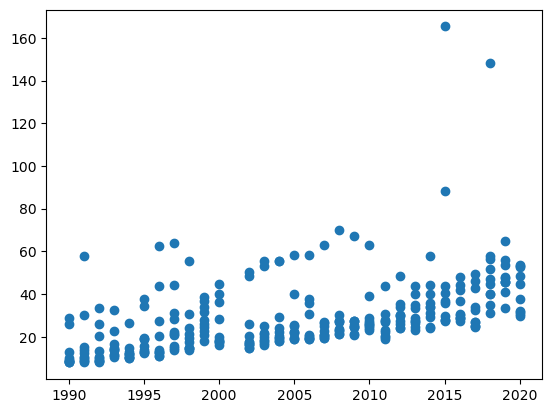

In [133]:
import matplotlib.pyplot as plt

plt.scatter(adjusted_df.Year, adjusted_df.Adjusted_Earnings)

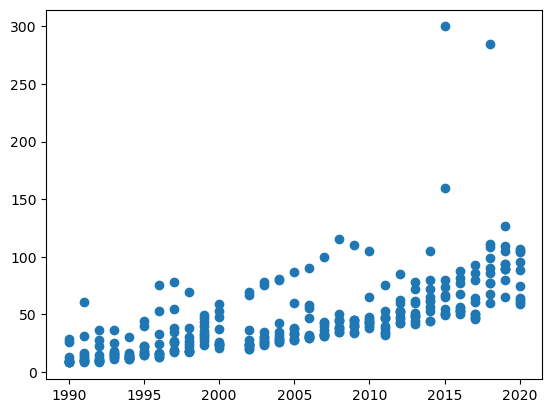

In [135]:
plt.scatter(adjusted_df.Year, adjusted_df["earnings ($ million)"])
plt.show()

In [137]:
adjusted_df.sort_values(by = "Adjusted_Earnings", ascending = False)

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million),inflation,Adjusted_Earnings
241,Floyd Mayweather,USA,1,1,Boxing,2015,300.0,0.814021,165.378433
271,Floyd Mayweather,USA,1,>100,Boxing,2018,285.0,0.921859,148.293953
242,Manny Pacquiao,Philippines,2,11,Boxing,2015,160.0,0.814021,88.201831
171,Tiger Woods,USA,1,1,Golf,2008,115.0,0.647828,69.788824
181,Tiger Woods,USA,1,1,Golf,2009,110.0,0.641970,66.992718
...,...,...,...,...,...,...,...,...,...
19,Sugar Ray Leonard,USA,10,6,Golf,1991,8.5,0.042350,8.154653
9,Evander Holyfield,USA,8,NaN,Boxing,1990,8.1,0.000000,8.100000
8,Arnold Palmer,USA,8,NaN,Golf,1990,8.1,0.000000,8.100000
7,Michael Jordan,USA,8,NaN,Basketball,1990,8.1,0.000000,8.100000


In [139]:
adjusted_df.loc[adjusted_df.Name == "Floyd Mayweather"].sort_values(by = "Year")

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million),inflation,Adjusted_Earnings
192,Floyd Mayweather,USA,2,>10,Boxing,2010,65.0,0.668899,38.947844
211,Floyd Mayweather,USA,1,?,Boxing,2012,85.0,0.757208,48.372180
231,Floyd Mayweather,USA,1,14,Boxing,2014,105.0,0.811872,57.951116
241,Floyd Mayweather,USA,1,1,Boxing,2015,300.0,0.814021,165.378433
271,Floyd Mayweather,USA,1,>100,Boxing,2018,285.0,0.921859,148.293953


In [ ]:
athlete_df.Year.value_counts()

In [ ]:
athlete_df.loc[athlete_df.Name==2002]

In [ ]:
athlete_df.loc[athlete_df.Name=="Jeff Gordon"]